In [101]:
import numpy as np
import gc
import matplotlib.pyplot as plt


gc.collect()

16666

[0.02 0.05 0.1  0.2  0.3  0.5  0.7  0.9  1.5  1.9 ]


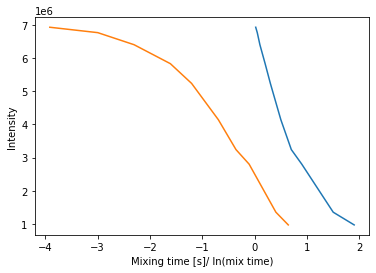

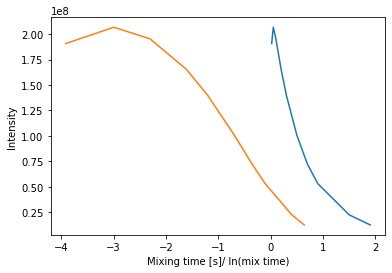

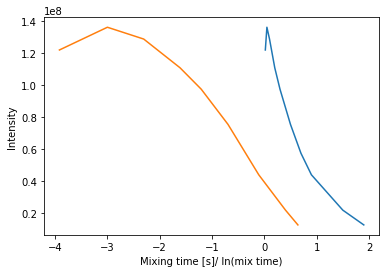

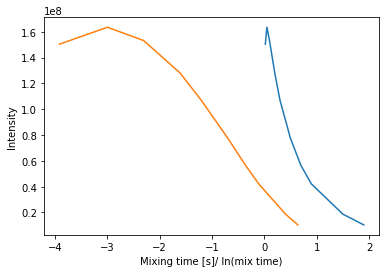

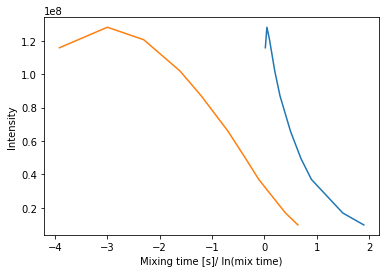

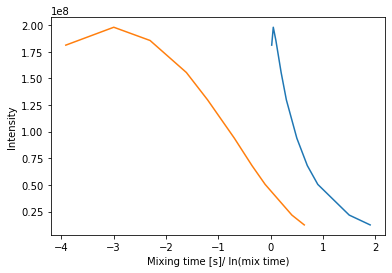

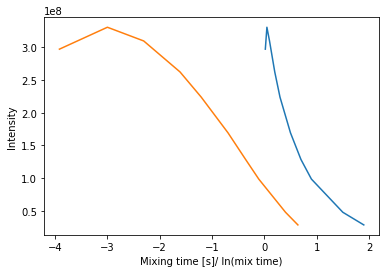

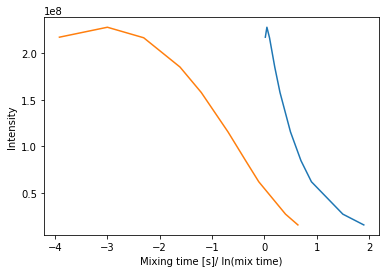

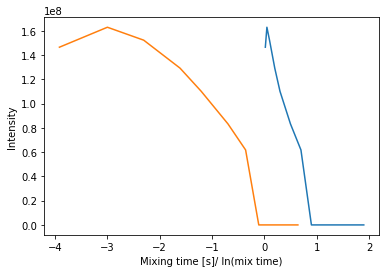

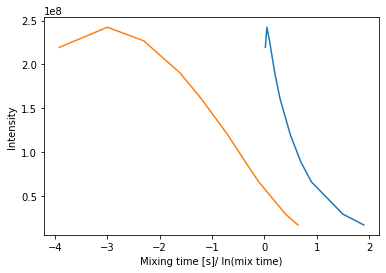

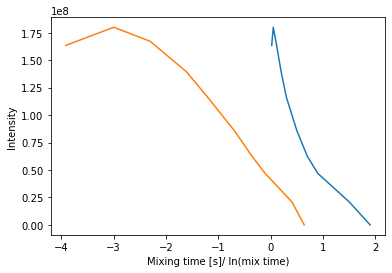

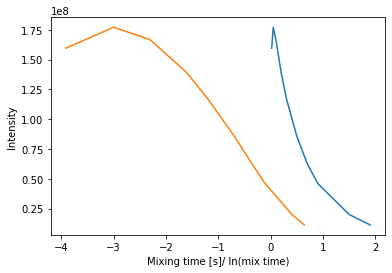

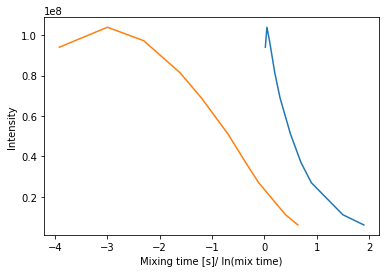

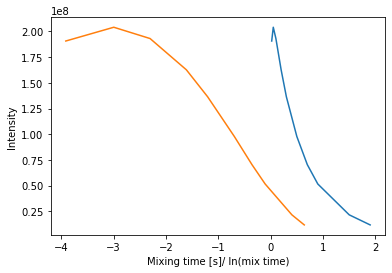

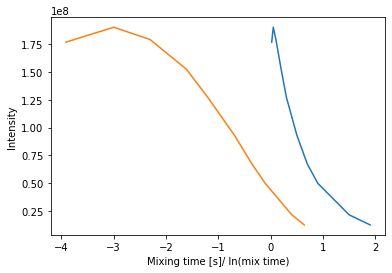

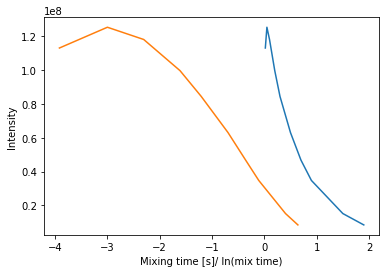

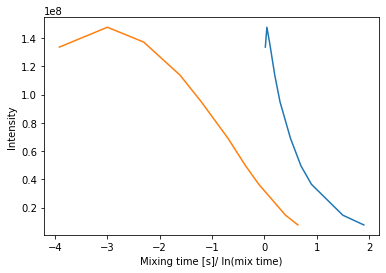

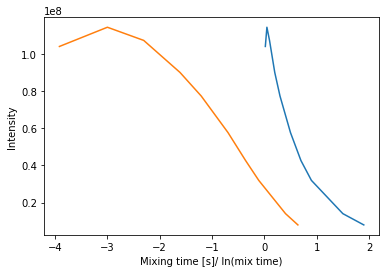

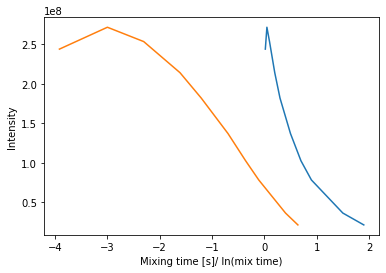

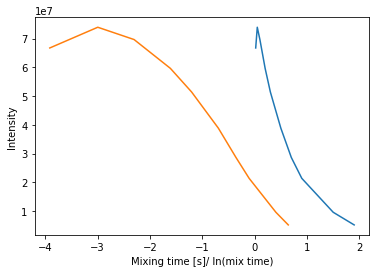

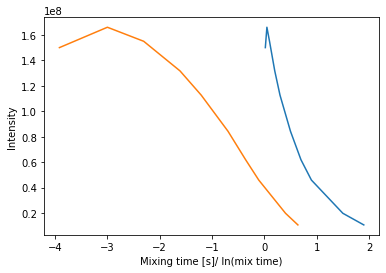

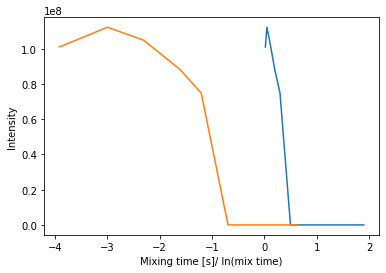

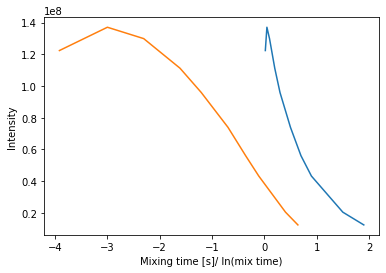

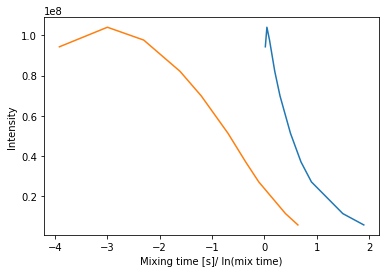

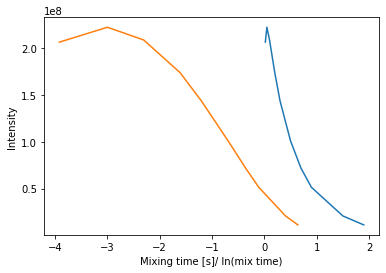

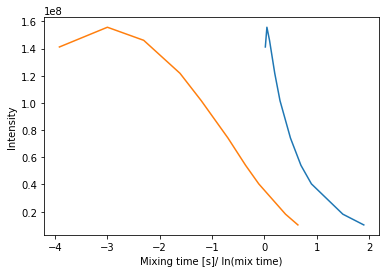

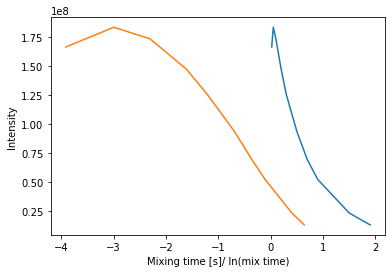

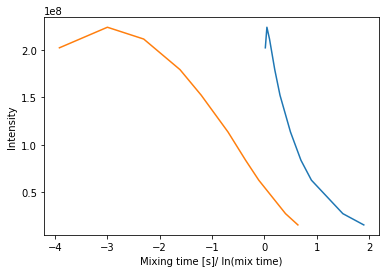

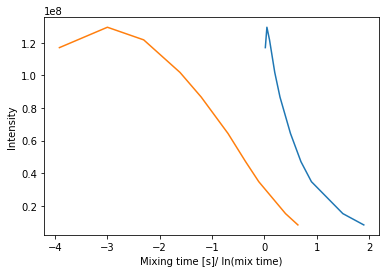

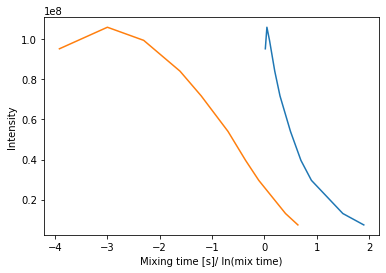

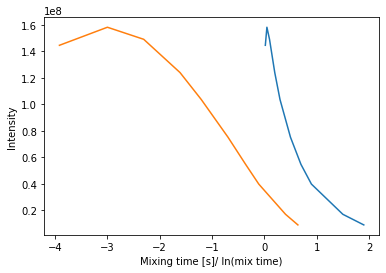

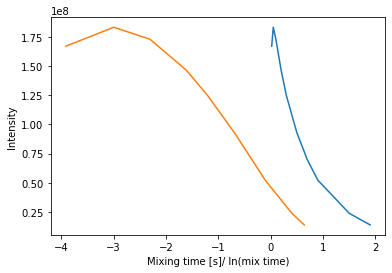

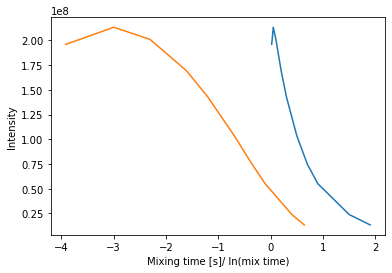

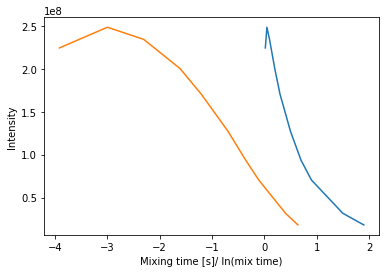

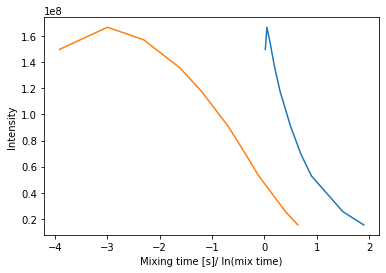

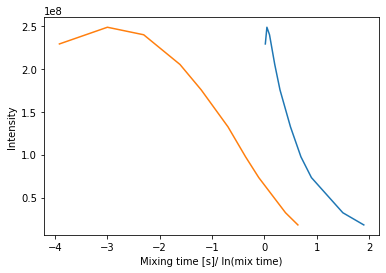

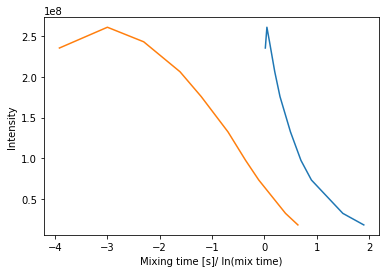

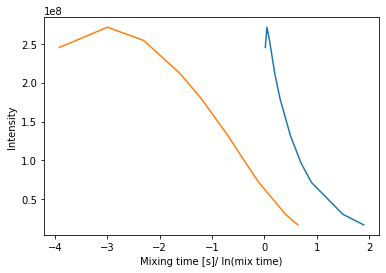

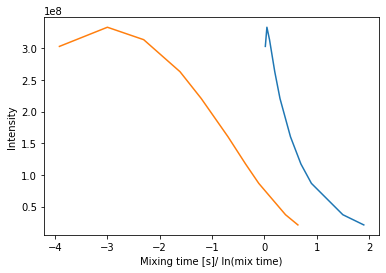

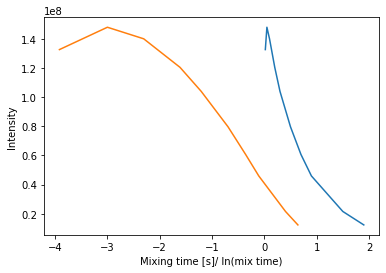

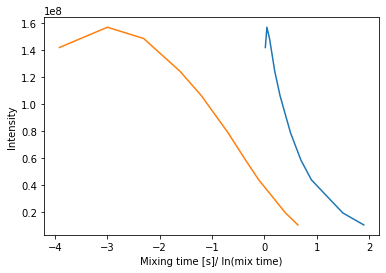

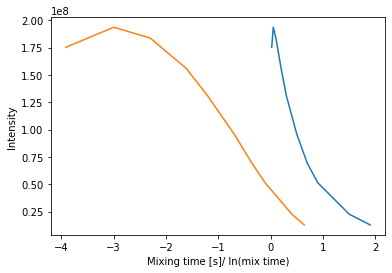

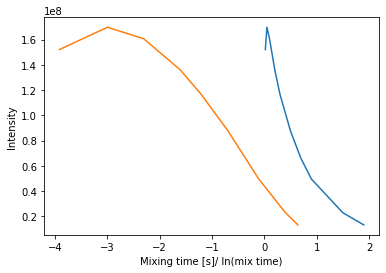

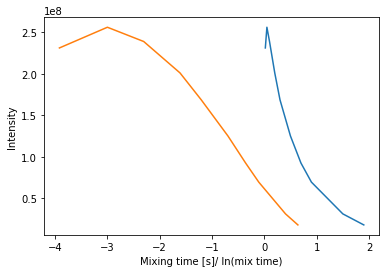

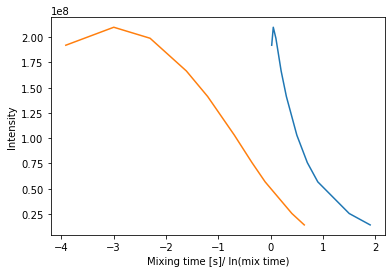

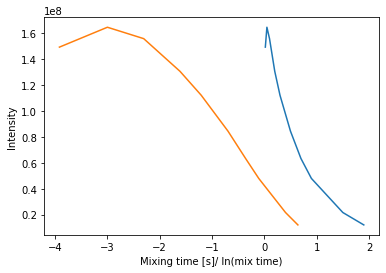

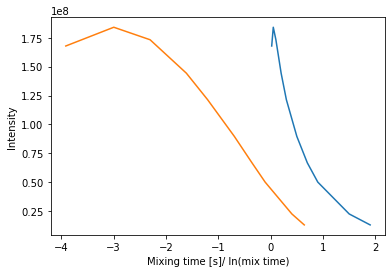

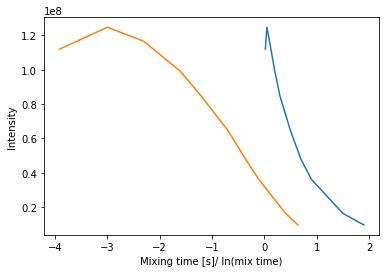

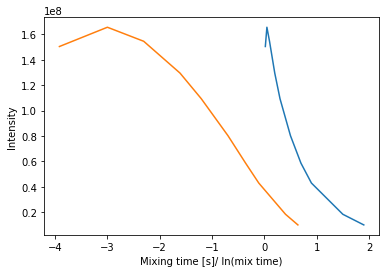

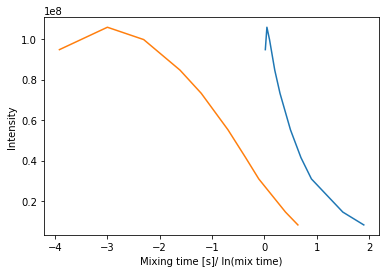

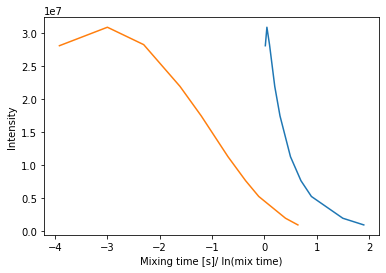

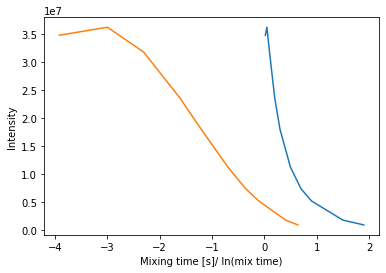

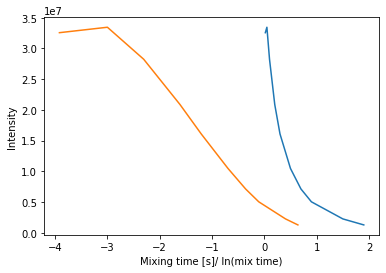

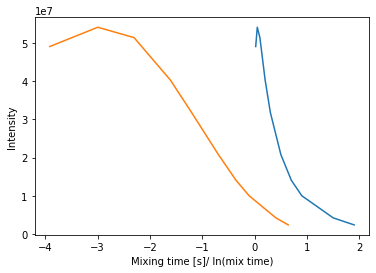

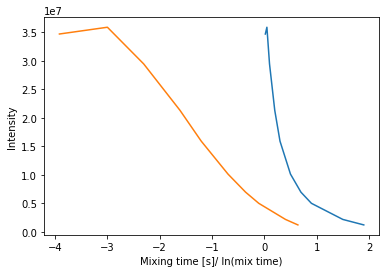

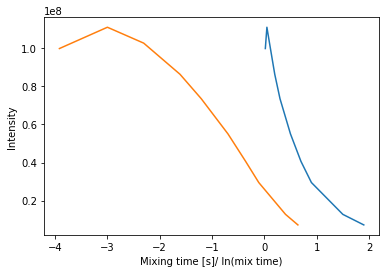

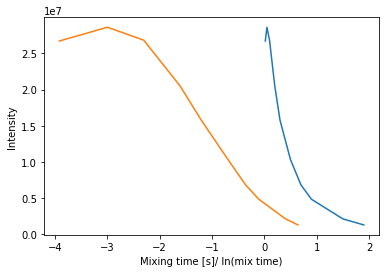

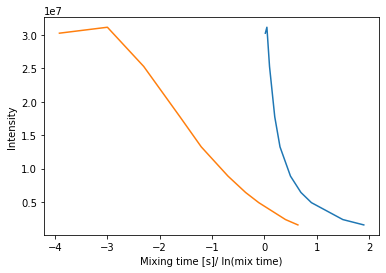

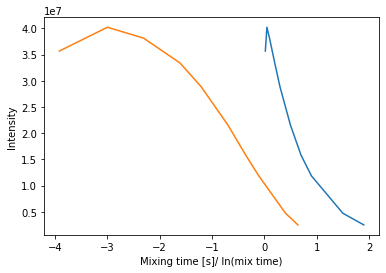

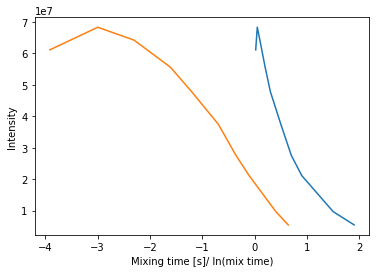

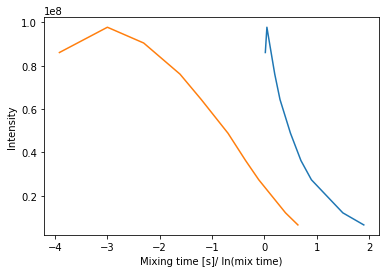

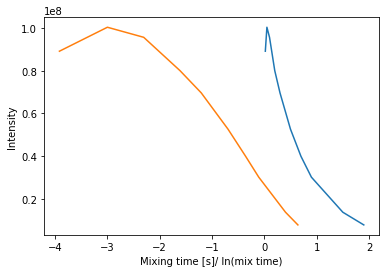

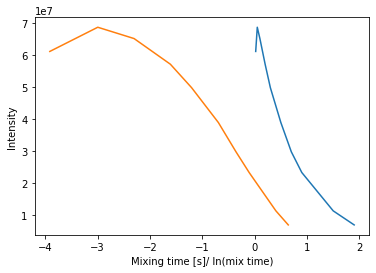

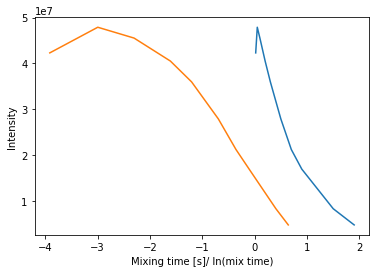

In [111]:
with open("COR15A_20mM_NaP_T1_181incr_not_all_first_ponts_removed.txt","r") as f:
    read_data=False
    peak_list=False
    peak=0
    for line in f:
        if "integrals" in line and len(line.split())==2:
            read_data=True
            
        
        if "integral errors" in line:
            read_data=False
        
        if read_data:
            #peaks_intensities=np.array([])
            if "Mixing time [s]:" in line:
                mixing_times=np.array(line.split()[3:])
                mixing_times = mixing_times.astype('float64')
                print(mixing_times)
            elif "Peak name" in line or "SECTION:" in line:
                pass
            else:
                if peak==0:
                    peaks_intensities=[np.zeros(len(line.split()))]
                    line_length=len(line.split())
                elif line_length==len(line.split()):
                    intensities=np.array(line.split())
                    intensities = [intensities.astype('float64')]
                    peaks_intensities=np.append(peaks_intensities,intensities,axis=0)
                peak+=1
                
                
                #print(line)
for i in range(1,peaks_intensities.shape[0]):
    plt.plot(mixing_times, peaks_intensities[i,1:])
    plt.plot(np.log(mixing_times), peaks_intensities[i,1:])
    plt.xlabel('Mixing time [s]/ ln(mix time)')
    plt.ylabel('Intensity')
    plt.show()
    
    #print(np.log(peaks_intensities[i,1:]))
    #print(peaks_intensities[i,1:])
    

In [100]:
peaks_intensities.shape

(65, 11)